<a target="_blank" href="https://colab.research.google.com/github/Sebelino/DD2424-project/blob/main/e1_sebastian.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [5]:
from determinism import Determinism

determinism = Determinism(seed=43).sow()  # Keep this before any torch import
print("Training results should now be reproducible.")


Training results should now be reproducible.


# Train model

In [17]:
from typing import Literal
import augmentation
from augmentation import AugmentationParams
%reload_ext autoreload
%autoreload 2

from training import TrainParams, NagParams
from evaluation import evaluate_test_accuracy_and_misclassified, \
    evaluate_with_train_val_plot, run_with_different_seeds
from run import run
from caching import invalidate_cache_entry
from datasets import DatasetParams

dataset_params = DatasetParams(
    splitting_seed=determinism.seed,
    shuffler_seed=determinism.seed,
    batch_size=32,
#     #class_fractions=(0.2,)*37,
#     class_fractions=(1.0,) * 37,
    trainval_size=None,
    validation_set_fraction=0.1,  # 20 % of trainval set
)

architecture: Literal["resnet18", "resnet34", "resnet50"] = "resnet50"
baseline_params = TrainParams(
    seed=determinism.seed,
    architecture=architecture,
    n_epochs=30,
    optimizer=NagParams(
        learning_rate=0.004713842776302303,
        weight_decay=4.287389519996026e-06,
        momentum=0.7222321829989696,
    ),
    freeze_layers=True,
    unfreezing_epochs=None,
    augmentation=AugmentationParams(
        enabled=True,
        transform=augmentation.to_transform(architecture, ["resize", "flip"]),
#         dropout_rate=0.485732545717694
        dropout_rate= 0.3
    ),
    validation_freq=1,
    time_limit_seconds=None,
    val_acc_target=0.98,
    unfreeze_last_l_blocks=5,
    use_scheduler=True,               
    scheduler_type="plateau"         
)


# run_args = (dataset_params, baseline_params, determinism)

# # Set invalidate=True to invalidate a single cache entry
# invalidate_cache_entry(run, run_args, invalidate=False)

# # First plot: Training and validation accuracy
# print("Training with params:")
# print(baseline_params.pprint())
# result = run(*run_args)

# print("Training result:")
# print(result.pprint())
# evaluate_with_train_val_plot(result)



# # import matplotlib.pyplot as plt

# # # Plot training and validation accuracy
# # epochs = result.epochs
# # train_acc = result.training_accuracies
# # val_acc = result.validation_accuracies

# # plt.figure(figsize=(10, 5))
# # plt.plot(epochs, train_acc, label="Training Accuracy")
# # plt.plot(epochs, val_acc, label="Validation Accuracy")
# # plt.xlabel("Epoch")
# # plt.ylabel("Accuracy")
# # plt.title("Training and Validation Accuracy")
# # plt.legend()
# # plt.grid(True)

# # plt.savefig("accuracy_plot.png", dpi=300)
# # print("Saved plot to 'accuracy_plot.png'")
# # plt.show()



Test size: 3669
Trying to load trainer from disk...


/opt/python/3.10/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Trainer not found. Retraining...
[Trainer] Unfroze last 2 blocks


Update step:   0%|          | 0/3450 [00:00<?, ?it/s]

Epoch [1/30], Loss: 2.3736, Train Acc: 57.72%
Epoch [2/30], Loss: 0.6027, Train Acc: 87.69%
Epoch [3/30], Loss: 0.3338, Train Acc: 91.77%
Epoch [4/30], Loss: 0.2397, Train Acc: 93.78%
Epoch [5/30], Loss: 0.1816, Train Acc: 95.19%
Epoch [6/30], Loss: 0.1284, Train Acc: 96.98%
Epoch [7/30], Loss: 0.1107, Train Acc: 97.28%
Epoch [8/30], Loss: 0.0923, Train Acc: 97.96%
Epoch [9/30], Loss: 0.0807, Train Acc: 98.15%
Epoch [10/30], Loss: 0.0672, Train Acc: 98.61%
Epoch [11/30], Loss: 0.0547, Train Acc: 99.05%
Epoch [12/30], Loss: 0.0542, Train Acc: 98.53%
Epoch [13/30], Loss: 0.0422, Train Acc: 99.02%
Epoch [14/30], Loss: 0.0346, Train Acc: 99.35%
Epoch [15/30], Loss: 0.0334, Train Acc: 99.29%
Epoch [16/30], Loss: 0.0294, Train Acc: 99.46%
Epoch [17/30], Loss: 0.0250, Train Acc: 99.73%
Epoch [18/30], Loss: 0.0287, Train Acc: 99.43%
Epoch [19/30], Loss: 0.0205, Train Acc: 99.62%
Epoch [20/30], Loss: 0.0198, Train Acc: 99.67%
Epoch [21/30], Loss: 0.0215, Train Acc: 99.59%
Epoch [22/30], Loss: 0

Evaluating:   0%|          | 0/115 [00:00<?, ?it/s]

Test Accuracy: 93.404 %
Trying to load trainer from disk...
Trainer not found. Retraining...
[Trainer] Unfroze last 2 blocks


Update step:   0%|          | 0/3450 [00:00<?, ?it/s]

Epoch [1/30], Loss: 2.3519, Train Acc: 60.30%
Epoch [2/30], Loss: 0.5929, Train Acc: 88.29%
Epoch [3/30], Loss: 0.3307, Train Acc: 92.04%
Epoch [4/30], Loss: 0.2398, Train Acc: 93.78%
Epoch [5/30], Loss: 0.1820, Train Acc: 95.16%
Epoch [6/30], Loss: 0.1287, Train Acc: 96.90%
Epoch [7/30], Loss: 0.1098, Train Acc: 97.42%
Epoch [8/30], Loss: 0.0956, Train Acc: 97.74%
Epoch [9/30], Loss: 0.0796, Train Acc: 97.99%
Epoch [10/30], Loss: 0.0675, Train Acc: 98.61%
Epoch [11/30], Loss: 0.0553, Train Acc: 98.86%
Epoch [12/30], Loss: 0.0557, Train Acc: 98.56%
Epoch [13/30], Loss: 0.0441, Train Acc: 99.05%
Epoch [14/30], Loss: 0.0359, Train Acc: 99.27%
Epoch [15/30], Loss: 0.0296, Train Acc: 99.35%
Epoch [16/30], Loss: 0.0332, Train Acc: 99.35%
Epoch [17/30], Loss: 0.0269, Train Acc: 99.59%
Epoch [18/30], Loss: 0.0299, Train Acc: 99.18%
Epoch [19/30], Loss: 0.0203, Train Acc: 99.57%
Epoch [20/30], Loss: 0.0184, Train Acc: 99.70%
Epoch [21/30], Loss: 0.0231, Train Acc: 99.51%
Epoch [22/30], Loss: 0

Evaluating:   0%|          | 0/115 [00:00<?, ?it/s]

Test Accuracy: 93.377 %
Test Accuracy Mean: 93.39 %
Test Accuracy Standard Error: 0.01 percentage points
Number of misclassified samples: 243


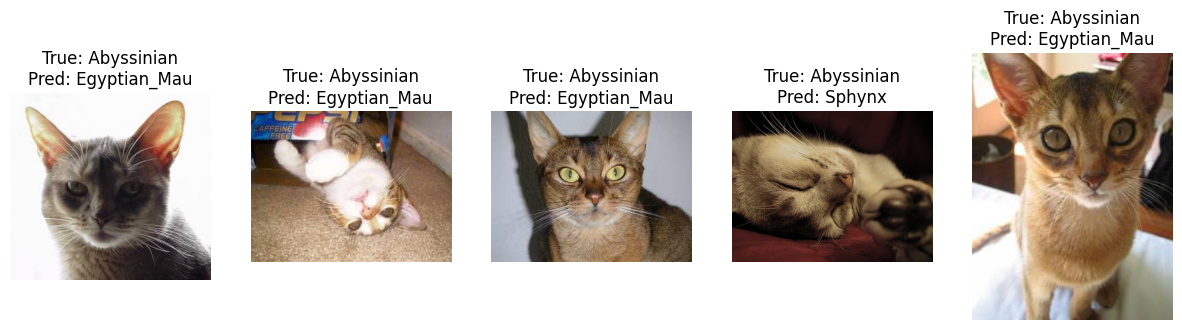

Copied 243 misclassified images to ./misclassified


In [12]:
# # unfreeze layers:2

# from evaluation import evaluate_final_test_accuracy

# evaluate_final_test_accuracy(
#     dataset_params,
#     baseline_params,
#     determinism,
#     trials=2,
#     display_misclassified=True,
# )

Test size: 3669
Trying to load trainer from disk...


/opt/python/3.10/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Trainer not found. Retraining...
[Trainer] Unfroze last 3 blocks


Update step:   0%|          | 0/3450 [00:00<?, ?it/s]

Epoch [1/30], Loss: 2.3639, Train Acc: 57.88%
Epoch [2/30], Loss: 0.5891, Train Acc: 88.04%
Epoch [3/30], Loss: 0.3258, Train Acc: 91.98%
Epoch [4/30], Loss: 0.2324, Train Acc: 93.99%
Epoch [5/30], Loss: 0.1739, Train Acc: 95.41%
Epoch [6/30], Loss: 0.1210, Train Acc: 97.34%
Epoch [7/30], Loss: 0.1046, Train Acc: 97.47%
Epoch [8/30], Loss: 0.0864, Train Acc: 98.15%
Epoch [9/30], Loss: 0.0757, Train Acc: 98.18%
Epoch [10/30], Loss: 0.0631, Train Acc: 98.51%
Epoch [11/30], Loss: 0.0498, Train Acc: 99.05%
Epoch [12/30], Loss: 0.0496, Train Acc: 98.80%
Epoch [13/30], Loss: 0.0380, Train Acc: 99.29%
Epoch [14/30], Loss: 0.0324, Train Acc: 99.35%
Epoch [15/30], Loss: 0.0320, Train Acc: 99.32%
Epoch [16/30], Loss: 0.0285, Train Acc: 99.43%
Epoch [17/30], Loss: 0.0244, Train Acc: 99.59%
Epoch [18/30], Loss: 0.0258, Train Acc: 99.57%
Epoch [19/30], Loss: 0.0184, Train Acc: 99.76%
Epoch [20/30], Loss: 0.0173, Train Acc: 99.78%
Epoch [21/30], Loss: 0.0194, Train Acc: 99.70%
Epoch [22/30], Loss: 0

Evaluating:   0%|          | 0/115 [00:00<?, ?it/s]

Test Accuracy: 93.459 %
Trying to load trainer from disk...
Trainer not found. Retraining...
[Trainer] Unfroze last 3 blocks


Update step:   0%|          | 0/3450 [00:00<?, ?it/s]

Epoch [1/30], Loss: 2.3411, Train Acc: 60.43%
Epoch [2/30], Loss: 0.5780, Train Acc: 88.15%
Epoch [3/30], Loss: 0.3222, Train Acc: 92.42%
Epoch [4/30], Loss: 0.2322, Train Acc: 94.02%
Epoch [5/30], Loss: 0.1741, Train Acc: 95.43%
Epoch [6/30], Loss: 0.1206, Train Acc: 97.17%
Epoch [7/30], Loss: 0.1050, Train Acc: 97.36%
Epoch [8/30], Loss: 0.0889, Train Acc: 97.91%
Epoch [9/30], Loss: 0.0747, Train Acc: 98.34%
Epoch [10/30], Loss: 0.0635, Train Acc: 98.61%
Epoch [11/30], Loss: 0.0501, Train Acc: 99.13%
Epoch [12/30], Loss: 0.0508, Train Acc: 98.91%
Epoch [13/30], Loss: 0.0402, Train Acc: 99.32%
Epoch [14/30], Loss: 0.0336, Train Acc: 99.40%
Epoch [15/30], Loss: 0.0283, Train Acc: 99.46%
Epoch [16/30], Loss: 0.0319, Train Acc: 99.40%
Epoch [17/30], Loss: 0.0256, Train Acc: 99.59%
Epoch [18/30], Loss: 0.0275, Train Acc: 99.35%
Epoch [19/30], Loss: 0.0193, Train Acc: 99.62%
Epoch [20/30], Loss: 0.0180, Train Acc: 99.70%
Epoch [21/30], Loss: 0.0209, Train Acc: 99.59%
Epoch [22/30], Loss: 0

Evaluating:   0%|          | 0/115 [00:00<?, ?it/s]

Test Accuracy: 93.268 %
Test Accuracy Mean: 93.36 %
Test Accuracy Standard Error: 0.10 percentage points
Number of misclassified samples: 247


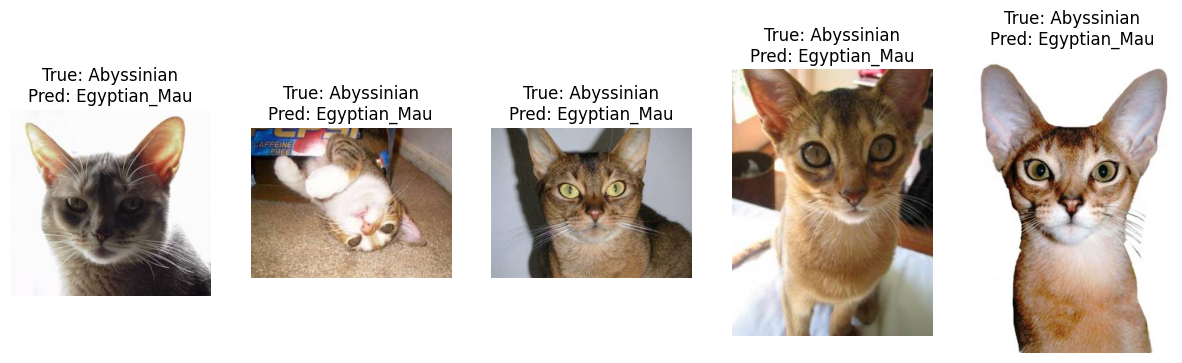

Copied 247 misclassified images to ./misclassified


In [14]:
# # unfreeze layers:3

# from evaluation import evaluate_final_test_accuracy

# evaluate_final_test_accuracy(
#     dataset_params,
#     baseline_params,
#     determinism,
#     trials=2,
#     display_misclassified=True,
# )

Test size: 3669
Trying to load trainer from disk...


/opt/python/3.10/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Trainer not found. Retraining...
[Trainer] Unfroze last 4 blocks


Update step:   0%|          | 0/3450 [00:00<?, ?it/s]

Epoch [1/30], Loss: 2.3525, Train Acc: 57.91%
Epoch [2/30], Loss: 0.5796, Train Acc: 88.42%
Epoch [3/30], Loss: 0.3222, Train Acc: 92.01%
Epoch [4/30], Loss: 0.2299, Train Acc: 94.24%
Epoch [5/30], Loss: 0.1712, Train Acc: 95.30%
Epoch [6/30], Loss: 0.1190, Train Acc: 97.39%
Epoch [7/30], Loss: 0.1033, Train Acc: 97.55%
Epoch [8/30], Loss: 0.0846, Train Acc: 98.07%
Epoch [9/30], Loss: 0.0742, Train Acc: 98.23%
Epoch [10/30], Loss: 0.0617, Train Acc: 98.51%
Epoch [11/30], Loss: 0.0479, Train Acc: 99.08%
Epoch [12/30], Loss: 0.0483, Train Acc: 98.83%
Epoch [13/30], Loss: 0.0373, Train Acc: 99.35%
Epoch [14/30], Loss: 0.0324, Train Acc: 99.35%
Epoch [15/30], Loss: 0.0308, Train Acc: 99.40%
Epoch [16/30], Loss: 0.0285, Train Acc: 99.51%
Epoch [17/30], Loss: 0.0243, Train Acc: 99.59%
Epoch [18/30], Loss: 0.0250, Train Acc: 99.70%
Epoch [19/30], Loss: 0.0181, Train Acc: 99.65%
Epoch [20/30], Loss: 0.0164, Train Acc: 99.84%
Epoch [21/30], Loss: 0.0180, Train Acc: 99.70%
Epoch [22/30], Loss: 0

Evaluating:   0%|          | 0/115 [00:00<?, ?it/s]

Test Accuracy: 93.486 %
Trying to load trainer from disk...
Trainer not found. Retraining...
[Trainer] Unfroze last 4 blocks


Update step:   0%|          | 0/3450 [00:00<?, ?it/s]

Epoch [1/30], Loss: 2.3252, Train Acc: 60.79%
Epoch [2/30], Loss: 0.5675, Train Acc: 88.51%
Epoch [3/30], Loss: 0.3195, Train Acc: 92.23%
Epoch [4/30], Loss: 0.2289, Train Acc: 94.24%
Epoch [5/30], Loss: 0.1716, Train Acc: 95.60%
Epoch [6/30], Loss: 0.1182, Train Acc: 97.07%
Epoch [7/30], Loss: 0.1028, Train Acc: 97.39%
Epoch [8/30], Loss: 0.0872, Train Acc: 97.88%
Epoch [9/30], Loss: 0.0740, Train Acc: 98.34%
Epoch [10/30], Loss: 0.0625, Train Acc: 98.75%
Epoch [11/30], Loss: 0.0488, Train Acc: 99.24%
Epoch [12/30], Loss: 0.0483, Train Acc: 98.97%
Epoch [13/30], Loss: 0.0376, Train Acc: 99.40%
Epoch [14/30], Loss: 0.0319, Train Acc: 99.48%
Epoch [15/30], Loss: 0.0267, Train Acc: 99.46%
Epoch [16/30], Loss: 0.0304, Train Acc: 99.40%
Epoch [17/30], Loss: 0.0247, Train Acc: 99.54%
Epoch [18/30], Loss: 0.0274, Train Acc: 99.35%
Epoch [19/30], Loss: 0.0186, Train Acc: 99.73%
Epoch [20/30], Loss: 0.0168, Train Acc: 99.76%
Epoch [21/30], Loss: 0.0205, Train Acc: 99.59%
Epoch [22/30], Loss: 0

Evaluating:   0%|          | 0/115 [00:00<?, ?it/s]

Test Accuracy: 93.459 %
Test Accuracy Mean: 93.47 %
Test Accuracy Standard Error: 0.01 percentage points
Number of misclassified samples: 240


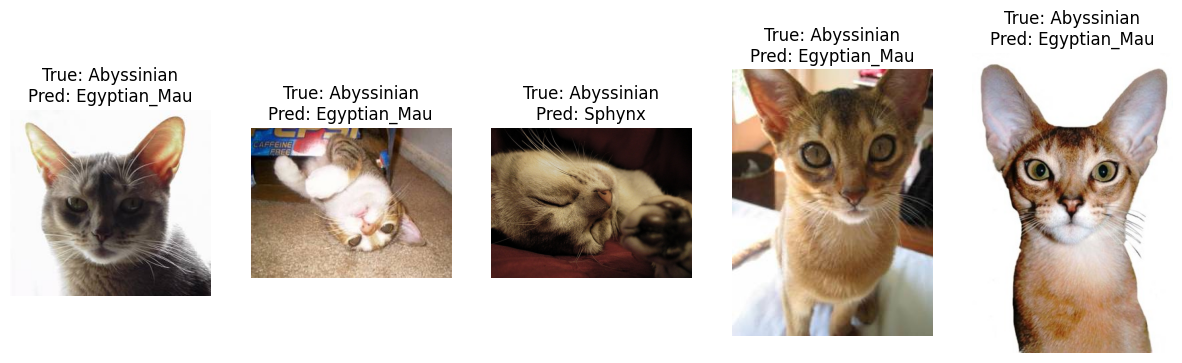

Copied 240 misclassified images to ./misclassified


In [16]:
#unfreeze_last_l_blocks": 4

# from evaluation import evaluate_final_test_accuracy

# evaluate_final_test_accuracy(
#     dataset_params,
#     baseline_params,
#     determinism,
#     trials=2,
#     display_misclassified=True,
# )

Test size: 3669
Trying to load trainer from disk...


/opt/python/3.10/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Trainer not found. Retraining...
[Trainer] Unfroze last 5 blocks


Update step:   0%|          | 0/3450 [00:00<?, ?it/s]

Epoch [1/30], Loss: 2.3475, Train Acc: 57.80%
Epoch [2/30], Loss: 0.5757, Train Acc: 88.42%
Epoch [3/30], Loss: 0.3220, Train Acc: 91.93%
Epoch [4/30], Loss: 0.2291, Train Acc: 94.27%
Epoch [5/30], Loss: 0.1713, Train Acc: 95.43%
Epoch [6/30], Loss: 0.1186, Train Acc: 97.28%
Epoch [7/30], Loss: 0.1027, Train Acc: 97.61%
Epoch [8/30], Loss: 0.0856, Train Acc: 98.12%
Epoch [9/30], Loss: 0.0732, Train Acc: 98.37%
Epoch [10/30], Loss: 0.0632, Train Acc: 98.51%
Epoch [11/30], Loss: 0.0484, Train Acc: 99.08%
Epoch [12/30], Loss: 0.0489, Train Acc: 98.83%
Epoch [13/30], Loss: 0.0382, Train Acc: 99.18%
Epoch [14/30], Loss: 0.0344, Train Acc: 99.27%
Epoch [15/30], Loss: 0.0302, Train Acc: 99.35%
Epoch [16/30], Loss: 0.0290, Train Acc: 99.43%
Epoch [17/30], Loss: 0.0244, Train Acc: 99.57%
Epoch [18/30], Loss: 0.0256, Train Acc: 99.59%
Epoch [19/30], Loss: 0.0200, Train Acc: 99.59%
Epoch [20/30], Loss: 0.0163, Train Acc: 99.86%
Epoch [21/30], Loss: 0.0182, Train Acc: 99.76%
Epoch [22/30], Loss: 0

Evaluating:   0%|          | 0/115 [00:00<?, ?it/s]

Test Accuracy: 93.295 %
Trying to load trainer from disk...
Trainer not found. Retraining...
[Trainer] Unfroze last 5 blocks


Update step:   0%|          | 0/3450 [00:00<?, ?it/s]

Epoch [1/30], Loss: 2.3227, Train Acc: 61.09%
Epoch [2/30], Loss: 0.5657, Train Acc: 88.72%
Epoch [3/30], Loss: 0.3204, Train Acc: 91.96%
Epoch [4/30], Loss: 0.2277, Train Acc: 94.13%
Epoch [5/30], Loss: 0.1702, Train Acc: 95.65%
Epoch [6/30], Loss: 0.1172, Train Acc: 97.04%
Epoch [7/30], Loss: 0.1008, Train Acc: 97.64%
Epoch [8/30], Loss: 0.0883, Train Acc: 97.91%
Epoch [9/30], Loss: 0.0724, Train Acc: 98.53%
Epoch [10/30], Loss: 0.0630, Train Acc: 98.61%
Epoch [11/30], Loss: 0.0484, Train Acc: 99.16%
Epoch [12/30], Loss: 0.0515, Train Acc: 98.78%
Epoch [13/30], Loss: 0.0397, Train Acc: 99.21%
Epoch [14/30], Loss: 0.0320, Train Acc: 99.43%
Epoch [15/30], Loss: 0.0270, Train Acc: 99.46%
Epoch [16/30], Loss: 0.0311, Train Acc: 99.35%
Epoch [17/30], Loss: 0.0261, Train Acc: 99.54%
Epoch [18/30], Loss: 0.0259, Train Acc: 99.48%
Epoch [19/30], Loss: 0.0186, Train Acc: 99.73%
Epoch [20/30], Loss: 0.0157, Train Acc: 99.81%
Epoch [21/30], Loss: 0.0198, Train Acc: 99.67%
Epoch [22/30], Loss: 0

Evaluating:   0%|          | 0/115 [00:00<?, ?it/s]

Test Accuracy: 93.241 %
Test Accuracy Mean: 93.27 %
Test Accuracy Standard Error: 0.03 percentage points
Number of misclassified samples: 248


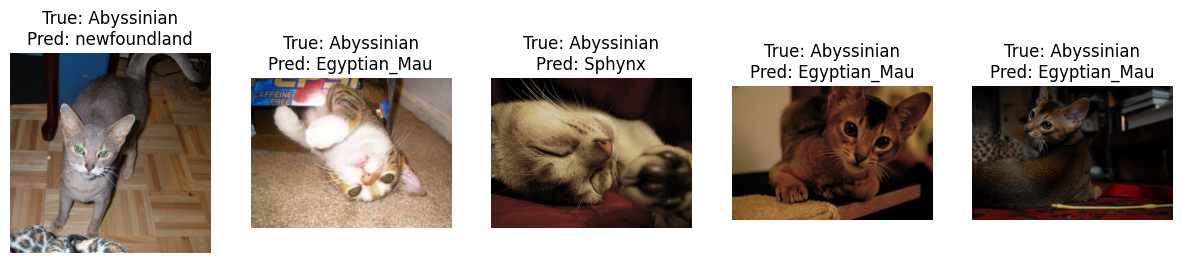

Copied 248 misclassified images to ./misclassified


In [18]:
# #unfreeze_last_l_blocks": 5

# from evaluation import evaluate_final_test_accuracy

# evaluate_final_test_accuracy(
#     dataset_params,
#     baseline_params,
#     determinism,
#     trials=2,
#     display_misclassified=True,
# )